<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/estuda_titanic_reglog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/MathMachado/DataFrames/master/Titanic_Original.csv'
df_titanic = pd.read_csv(url)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.columns = [coluna.lower() for coluna in df_titanic.columns]
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic['survived'].value_counts()/df_titanic.shape[0]

0    0.616162
1    0.383838
Name: survived, dtype: float64

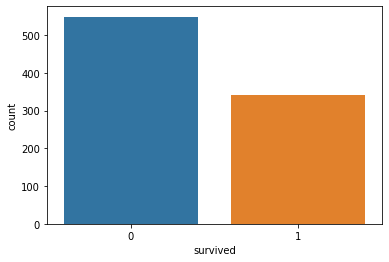

In [5]:
sns.countplot(x = 'survived', data = df_titanic)

In [6]:
df_titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [7]:
#calculo pela median
df_titanic_copia = df_titanic.copy()
#df_titanic = df_titanic_copia.copy()
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
mediana_age = df_titanic['age'].median()
mediana_fare = df_titanic['fare'].median()

In [9]:
mediana_age, mediana_fare

(28.0, 14.4542)

In [10]:
df_titanic['age'].fillna(mediana_age, inplace=True)
df_titanic['fare'].fillna(mediana_fare, inplace=True)


In [11]:
df_titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [12]:
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_titanic.drop(columns = ['passengerid', 'name', 'ticket', 'cabin'], axis = 1, inplace = True)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df_titanic[df_titanic['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [15]:
df_titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [17]:
df_titanic['embarked'].fillna('S', inplace=True)

In [18]:
df_titanic.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [19]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
#tratamento dos outliers

from scipy import stats 

def trata_outliers(df, coluna):
    sns.boxplot(x = coluna, data = df)

    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    mediana = df[coluna].median()
    print(f"Mediana: {mediana}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[df[coluna] > limite_superior_outliers, coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(mediana, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_superior_outliers

In [24]:
l_colunas_numericas = list(df_titanic.select_dtypes('int').columns)
l_colunas_numericas

['survived', 'pclass', 'sibsp', 'parch']

In [25]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


IQR: 13.0
Limite inferior para outlier: 2.5; Limite superior para outliers: 54.5
Mediana: 28.0


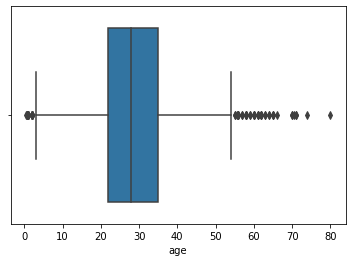

In [28]:
#passar a função trata out para age
df_titanic, limite_superior_outliers = trata_outliers(df = df_titanic, coluna = 'age')

In [29]:
limite_superior_outliers

54.5

In [30]:
#criou a coluna age_o 
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_o
0,0,3,male,22.0,1,0,7.2500,S,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0


In [31]:
age_outlier = df_titanic[df_titanic['age'] > limite_superior_outliers]
age_outlier.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_o
11,1,1,female,58.0,0,0,26.5500,S,28.0
15,1,2,female,55.0,0,0,16.0000,S,28.0
33,0,2,male,66.0,0,0,10.5000,S,28.0
54,0,1,male,65.0,0,1,61.9792,C,28.0
94,0,3,male,59.0,0,0,7.2500,S,28.0


IQR: 23.0896
Limite inferior para outlier: -26.724; Limite superior para outliers: 65.6344
Mediana: 14.4542


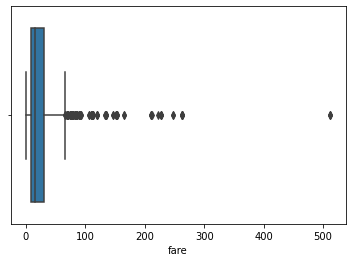

In [32]:
#passar a função trata out para fare
df_titanic, limite_superior_outliers = trata_outliers(df = df_titanic, coluna = 'fare')

In [33]:
fare_outlier = df_titanic[df_titanic['fare'] > limite_superior_outliers]
fare_outlier.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_o,fare_o
1,1,1,female,38.0,1,0,71.2833,C,38.0,14.4542
27,0,1,male,19.0,3,2,263.0000,S,19.0,14.4542
31,1,1,female,28.0,1,0,146.5208,C,28.0,14.4542
34,0,1,male,28.0,1,0,82.1708,C,28.0,14.4542
52,1,1,female,49.0,1,0,76.7292,C,49.0,14.4542


In [34]:
df_titanic['age']=df_titanic['age_o'].copy()
df_titanic['fare']=df_titanic['fare_o'].copy()

In [35]:
df_titanic.drop(columns=['age_o','fare_o' ], inplace = True)

In [36]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,14.4542,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df_titanic.select_dtypes('int').columns

Index(['survived', 'pclass', 'sibsp', 'parch'], dtype='object')

In [23]:
dummy = pd.get_dummies(df_titanic[['sex', 'embarked']])
dummy

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [38]:
df_titanic = pd.concat([df_titanic, dummy], axis = 1)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,14.4542,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [43]:
df_titanic.drop(columns=['sex' ], inplace = True)

In [44]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,14.4542,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [45]:
df_titanic2 = df_titanic.copy()

In [60]:
y=df_titanic['survived'].copy()
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [52]:
X = df_titanic2.copy()
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,14.4542,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [66]:
f_test_size = 0.3

In [67]:
#amostras

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = f_test_size)



In [68]:
X_treinamento.head()


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
652,3,21.0,0,0,8.4333,0,1,0,0,1
243,3,22.0,0,0,7.1250,0,1,0,0,1
407,2,3.0,1,1,18.7500,0,1,0,0,1
337,1,41.0,0,0,14.4542,1,0,1,0,0
135,2,23.0,0,0,15.0458,0,1,1,0,0


In [70]:
y_treinamento.head()

652    0
243    0
407    1
337    1
135    0
Name: survived, dtype: int64

In [71]:
modelo2 = LogisticRegression(penalty='none', solver='newton-cg')

In [72]:
modelo2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred = modelo2.predict_proba(X)

In [75]:
confusion_matrix(y, modelo2.predict(X))

array([[463,  86],
       [100, 242]])

In [78]:
acuracia = accuracy_score(y, modelo2.predict(X))
acuracia

0.7912457912457912